# Data Cleaning with Pandas

#### EDA
```python
df.info()  # Ver tipos de datos y valores nulos
df.columns  # Nombre de columnas
df.shape  # Tamaño (filas, columnas)
df.types  # Tipos de datos por columna
df.describe()  # Estadísticas  numérticas básicas
```

#### Missing values (Nan/None)
``` python
df.isnull().sum()  # Conteo de valores nulos por columna
df.isnull().mean()  # Porcentage de valores nulos por columna

df.dropna()  # Elimina filas con almenos un valor nulo
df.dropna(axis=1)  # Elimina columnas con almenos un valor nulo
df.dropna(subset=['col'])  # Elimina filas nulas de las cols especificadas
df.fillna(value)  # Rellena nulos con un valor
df['col'].fillna(df['col'].mean())  # Rellena nulos con la media
df['col'].interpolate()  # Interpolacion lineal en col
```

#### Rename cols and normalize strings
``` python
```

#### Typo conversion
``` python
```

#### Handling with outliers
``` python
```

#### Modify cols
``` python
```

#### Categorical values
``` python
```

#### Data validation
``` python
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
df = pd.read_csv("data/NFL Play by Play 2009-2017.csv")

C:\Users\isaul\AppData\Local\Temp\ipykernel_10668\3903212744.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/NFL Play by Play 2009-2017.csv")


In [4]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [6]:
df.shape

(407688, 102)

In [7]:
for col in df.columns: 
    print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [8]:
df.isna().sum().sort_values(ascending=False)

DefTwoPoint          407664
BlockingPlayer       407571
TwoPointConv         407083
ChalReplayResult     404286
RecFumbPlayer        403315
                      ...  
HomeTeam                  0
Timeout_Indicator         0
TwoPoint_Prob             0
ExPoint_Prob              0
Season                    0
Length: 102, dtype: int64

In [9]:
100 * df.isna().mean().round(14).sort_values(ascending=False)

DefTwoPoint          99.994113
BlockingPlayer       99.971302
TwoPointConv         99.851602
ChalReplayResult     99.165538
RecFumbPlayer        98.927366
                       ...    
HomeTeam              0.000000
Timeout_Indicator     0.000000
TwoPoint_Prob         0.000000
ExPoint_Prob          0.000000
Season                0.000000
Length: 102, dtype: float64

In [10]:
missing_values_count = df.isnull().sum()

missing_values_count[:20]

Date                 0
GameID               0
Drive                0
qtr                  0
down             61154
time               224
TimeUnder            0
TimeSecs           224
PlayTimeDiff       444
SideofField        528
yrdln              840
yrdline100         840
ydstogo              0
ydsnet               0
GoalToGo           840
FirstDown        28811
posteam          24992
DefensiveTeam    24992
desc                 2
PlayAttempted        0
dtype: int64

In [11]:
total_cells = df.shape[0] * df.shape[1]
total_missing = missing_values_count.sum()

percent_missing = np.round(100 * total_missing / total_cells, 4)
print('percent of missing values: ', percent_missing)

percent of missing values:  27.6672


## Handling Missing Values

### Figure out why the data is missing

### Drop missing values

In [12]:
df.dropna() # remove all cols with missing values 

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [13]:
cols_with_na_dropped = df.dropna(axis=1)
cols_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [14]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % cols_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 37


### Filling in values autmatically

In [15]:
subset_data = df.loc[:, 'EPA':'Season'].head()
subset_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [16]:
# Replace all NA's wit 0 value
subset_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Scaling and Normalization

* in **scaling**, you're changing the range of your data, while
* in **normalization**, you're changing the shape of the distribution of your data.

In [21]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 598.5 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 598.5 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 558.9 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 558.9 kB/s eta 0:00:02
   ------------------------------- -------- 1.0/1.4 MB 565.4 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 565.4 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 565.4 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 536.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import seaborn as sns

In [22]:
from mlxtend.preprocessing import minmax_scaling

In [25]:
# 1000 data points exponentially distributed
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 an 1
scaled_data = minmax_scaling(original_data, 0, 1)


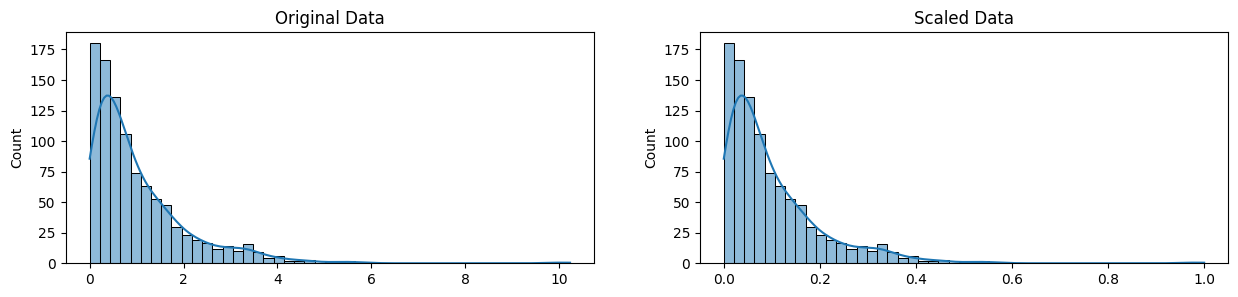

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title('Original Data')
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title('Scaled Data')
plt.show()

#### Normalizing with Box-Cox transformation

In [27]:
from scipy import stats

In [28]:
normalized_data = stats.boxcox(original_data)

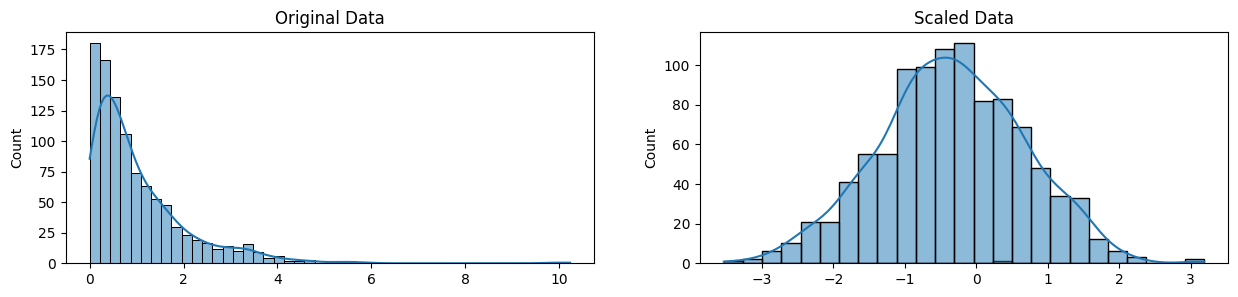

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title('Original Data')
sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title('Scaled Data')
plt.show()

## Parsing Dates

## Character Encondings